# 🍷 Wine Quality Prediction - Model Training & Comparison

This notebook trains multiple machine learning models to predict wine quality and selects the best performing model.

## Objectives:
1. Load preprocessed data
2. Train multiple ML algorithms
3. Compare model performance
4. Hyperparameter tuning for top models
5. Save the best model and results


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🚀 Starting model training pipeline...")


📚 Libraries imported successfully!
🚀 Starting model training pipeline...


## 1. Data Loading and Preparation


In [2]:
# Load preprocessed data
df = pd.read_csv('../data/processed/wine_processed.csv')

print("🍷 Loaded preprocessed wine dataset!")
print(f"📊 Dataset shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print(f"\nTarget distribution:")
print(df['quality_binary'].value_counts())
print(f"\nTarget distribution (percentage):")
print(df['quality_binary'].value_counts(normalize=True) * 100)


🍷 Loaded preprocessed wine dataset!
📊 Dataset shape: (1359, 12)
📋 Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality_binary']

Target distribution:
quality_binary
Bad     1175
Good     184
Name: count, dtype: int64

Target distribution (percentage):
quality_binary
Bad     86.460633
Good    13.539367
Name: proportion, dtype: float64


In [3]:
# Prepare features and target
features = [col for col in df.columns if col != 'quality_binary']
X = df[features]
y = df['quality_binary']

print(f"🔧 Data preparation:")
print(f"• Features: {len(features)}")
print(f"• Feature names: {features}")
print(f"• Target variable: quality_binary")
print(f"• Target classes: {y.unique()}")

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"• Encoded target classes: {le.classes_}")
print(f"• Encoded values: {np.unique(y_encoded)}")


🔧 Data preparation:
• Features: 11
• Feature names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
• Target variable: quality_binary
• Target classes: ['Bad' 'Good']
• Encoded target classes: ['Bad' 'Good']
• Encoded values: [0 1]


In [4]:
# Train-test split: 80-20, random_state=42, stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"📊 Train-test split:")
print(f"• Training set: {X_train.shape[0]} samples")
print(f"• Test set: {X_test.shape[0]} samples")
print(f"• Training set target distribution: {np.bincount(y_train)}")
print(f"• Test set target distribution: {np.bincount(y_test)}")

# Apply StandardScaler (though data is already scaled, we'll ensure consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Data scaling applied!")
print(f"• Training features shape: {X_train_scaled.shape}")
print(f"• Test features shape: {X_test_scaled.shape}")


📊 Train-test split:
• Training set: 1087 samples
• Test set: 272 samples
• Training set target distribution: [940 147]
• Test set target distribution: [235  37]
✅ Data scaling applied!
• Training features shape: (1087, 11)
• Test features shape: (272, 11)


## 2. Model Training and Evaluation


In [5]:
# Initialize models with default parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    'Support Vector Machine': SVC(random_state=42)
}

print("🤖 Initializing models:")
for name, model in models.items():
    print(f"• {name}")

# Store results
results = []
model_predictions = {}
model_confusion_matrices = {}


🤖 Initializing models:
• Logistic Regression
• Decision Tree
• Random Forest
• Gradient Boosting
• XGBoost
• Support Vector Machine


In [6]:
# Train and evaluate each model
print("🚀 Training and evaluating models...")
print("="*60)

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    model_predictions[name] = y_pred
    model_confusion_matrices[name] = cm
    
    print(f"✅ {name} completed!")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   F1-Score: {f1:.4f}")

print("\n🎉 All models trained and evaluated!")


🚀 Training and evaluating models...

🔄 Training Logistic Regression...
✅ Logistic Regression completed!
   Accuracy: 0.8787
   Precision: 0.8587
   Recall: 0.8787
   F1-Score: 0.8601

🔄 Training Decision Tree...
✅ Decision Tree completed!
   Accuracy: 0.8309
   Precision: 0.8347
   Recall: 0.8309
   F1-Score: 0.8327

🔄 Training Random Forest...
✅ Random Forest completed!
   Accuracy: 0.8860
   Precision: 0.8701
   Recall: 0.8860
   F1-Score: 0.8710

🔄 Training Gradient Boosting...
✅ Gradient Boosting completed!
   Accuracy: 0.8824
   Precision: 0.8686
   Recall: 0.8824
   F1-Score: 0.8724

🔄 Training XGBoost...
✅ XGBoost completed!
   Accuracy: 0.8824
   Precision: 0.8670
   Recall: 0.8824
   F1-Score: 0.8703

🔄 Training Support Vector Machine...
✅ Support Vector Machine completed!
   Accuracy: 0.8824
   Precision: 0.8647
   Recall: 0.8824
   F1-Score: 0.8570

🎉 All models trained and evaluated!


📊 Model Performance Comparison:
                    Model  Accuracy  Precision  Recall  F1-Score
2           Random Forest    0.8860     0.8701  0.8860    0.8710
3       Gradient Boosting    0.8824     0.8686  0.8824    0.8724
4                 XGBoost    0.8824     0.8670  0.8824    0.8703
5  Support Vector Machine    0.8824     0.8647  0.8824    0.8570
0     Logistic Regression    0.8787     0.8587  0.8787    0.8601
1           Decision Tree    0.8309     0.8347  0.8309    0.8327

🏆 Best Model: Random Forest
🎯 Best Accuracy: 0.8860


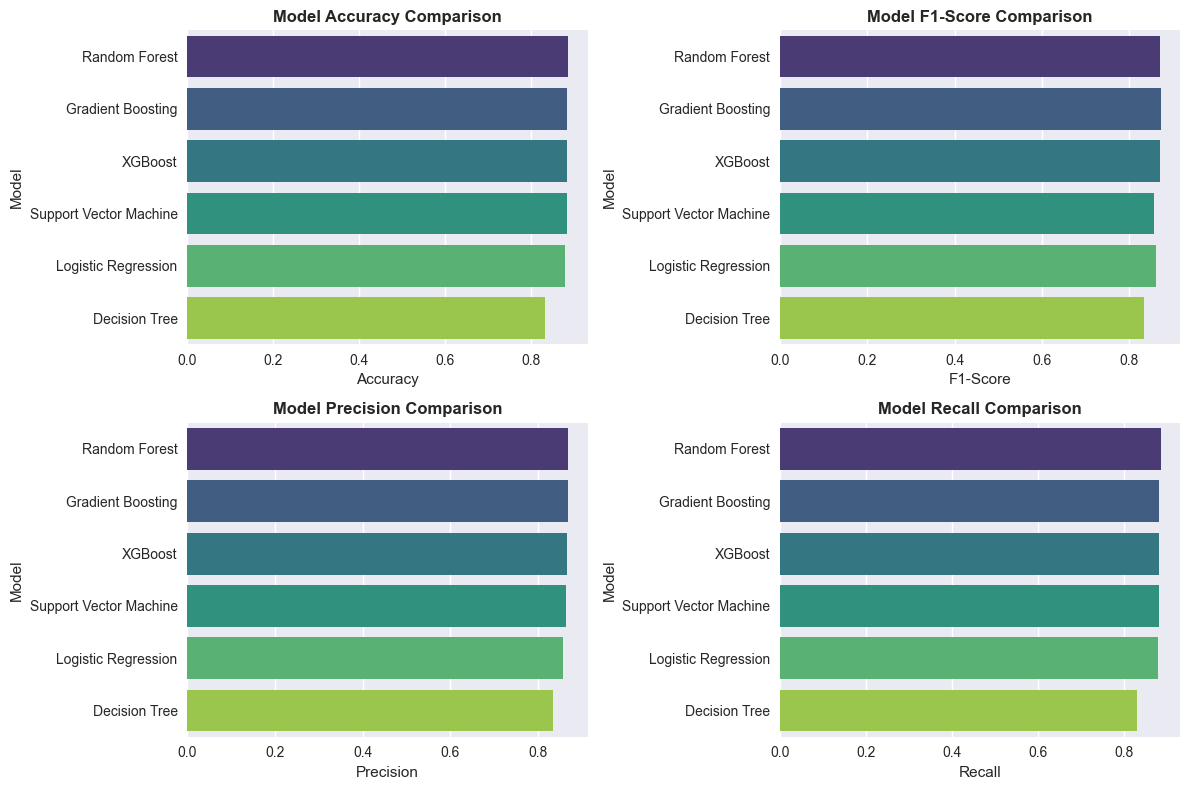

In [7]:
# Create results DataFrame and display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("📊 Model Performance Comparison:")
print("="*60)
print(results_df.round(4))

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"🎯 Best Accuracy: {best_accuracy:.4f}")

# Visualize model comparison
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison', fontweight='bold')
plt.xlabel('Accuracy')

# F1-Score comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x='F1-Score', y='Model', palette='viridis')
plt.title('Model F1-Score Comparison', fontweight='bold')
plt.xlabel('F1-Score')

# Precision comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x='Precision', y='Model', palette='viridis')
plt.title('Model Precision Comparison', fontweight='bold')
plt.xlabel('Precision')

# Recall comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x='Recall', y='Model', palette='viridis')
plt.title('Model Recall Comparison', fontweight='bold')
plt.xlabel('Recall')

plt.tight_layout()
plt.show()


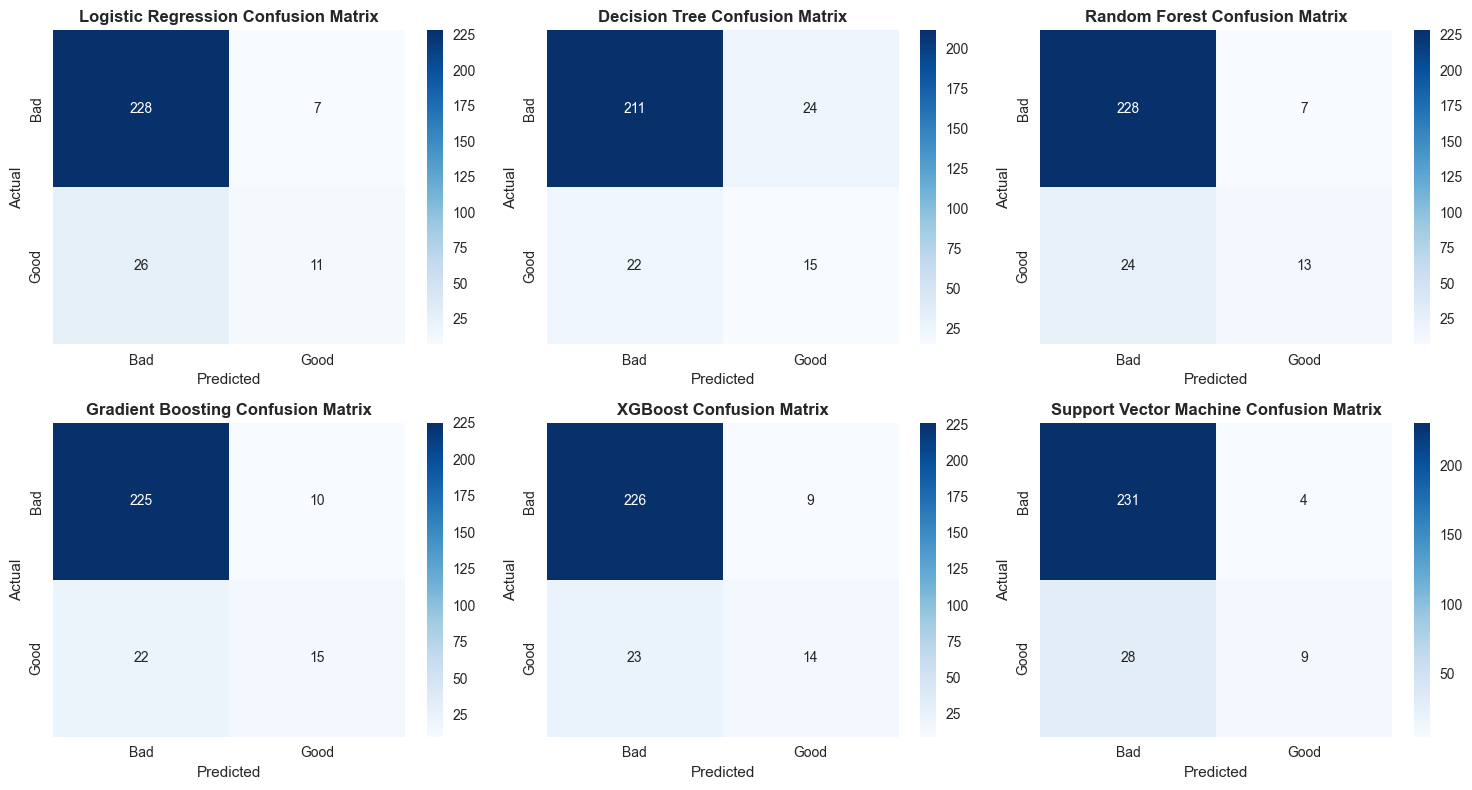

📋 Detailed Classification Reports:

🔍 Logistic Regression:
              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93       235
        Good       0.61      0.30      0.40        37

    accuracy                           0.88       272
   macro avg       0.75      0.63      0.67       272
weighted avg       0.86      0.88      0.86       272


🔍 Decision Tree:
              precision    recall  f1-score   support

         Bad       0.91      0.90      0.90       235
        Good       0.38      0.41      0.39        37

    accuracy                           0.83       272
   macro avg       0.65      0.65      0.65       272
weighted avg       0.83      0.83      0.83       272


🔍 Random Forest:
              precision    recall  f1-score   support

         Bad       0.90      0.97      0.94       235
        Good       0.65      0.35      0.46        37

    accuracy                           0.89       272
   macro avg       0.78      0.66

In [8]:
# Confusion matrices for all models
n_models = len(models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))
for i, (name, cm) in enumerate(model_confusion_matrices.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{name} Confusion Matrix', fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Detailed classification reports
print("📋 Detailed Classification Reports:")
print("="*60)
for name, y_pred in model_predictions.items():
    print(f"\n🔍 {name}:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))


## 3. Hyperparameter Tuning for Top 3 Models


In [9]:
# Get top 3 models for hyperparameter tuning
top_3_models = results_df.head(3)['Model'].tolist()
print(f"🎯 Top 3 models for hyperparameter tuning: {top_3_models}")

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
}

# Initialize tuned models
tuned_models = {}
tuned_results = []

print("🔧 Starting hyperparameter tuning...")
print("="*60)


🎯 Top 3 models for hyperparameter tuning: ['Random Forest', 'Gradient Boosting', 'XGBoost']
🔧 Starting hyperparameter tuning...


In [10]:
# Perform hyperparameter tuning for each top model
for model_name in top_3_models:
    if model_name in param_grids:
        print(f"\n🔄 Tuning {model_name}...")
        
        # Get base model
        base_model = models[model_name]
        
        # Perform GridSearchCV with 3-fold cross-validation
        grid_search = GridSearchCV(
            base_model, 
            param_grids[model_name], 
            cv=3, 
            scoring='accuracy', 
            n_jobs=-1,
            verbose=1
        )
        
        # Fit the grid search
        grid_search.fit(X_train_scaled, y_train)
        
        # Get best model and parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        # Make predictions with best model
        y_pred_tuned = best_model.predict(X_test_scaled)
        
        # Calculate metrics
        accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
        precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
        recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
        f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
        
        # Store results
        tuned_results.append({
            'Model': f"{model_name} (Tuned)",
            'Accuracy': accuracy_tuned,
            'Precision': precision_tuned,
            'Recall': recall_tuned,
            'F1-Score': f1_tuned,
            'Best_Params': best_params,
            'CV_Score': best_score
        })
        
        tuned_models[model_name] = best_model
        
        print(f"✅ {model_name} tuning completed!")
        print(f"   Best CV Score: {best_score:.4f}")
        print(f"   Test Accuracy: {accuracy_tuned:.4f}")
        print(f"   Best Parameters: {best_params}")
    else:
        print(f"⚠️ No parameter grid defined for {model_name}, skipping...")

print("\n🎉 Hyperparameter tuning completed!")



🔄 Tuning Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ Random Forest tuning completed!
   Best CV Score: 0.8933
   Test Accuracy: 0.8824
   Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

🔄 Tuning Gradient Boosting...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ Gradient Boosting tuning completed!
   Best CV Score: 0.8933
   Test Accuracy: 0.8787
   Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}

🔄 Tuning XGBoost...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ XGBoost tuning completed!
   Best CV Score: 0.8914
   Test Accuracy: 0.8750
   Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.8}

🎉 Hyperparameter tuning completed!


📊 Original vs Tuned Model Comparison:
                       Model  Accuracy  Precision  Recall  F1-Score
0              Random Forest    0.8860     0.8701  0.8860    0.8710
1          Gradient Boosting    0.8824     0.8686  0.8824    0.8724
2                    XGBoost    0.8824     0.8670  0.8824    0.8703
3     Support Vector Machine    0.8824     0.8647  0.8824    0.8570
6      Random Forest (Tuned)    0.8824     0.8639  0.8824    0.8630
4        Logistic Regression    0.8787     0.8587  0.8787    0.8601
7  Gradient Boosting (Tuned)    0.8787     0.8632  0.8787    0.8674
8            XGBoost (Tuned)    0.8750     0.8556  0.8750    0.8598
5              Decision Tree    0.8309     0.8347  0.8309    0.8327

🏆 Final Best Model: Random Forest
🎯 Final Best Accuracy: 0.8860


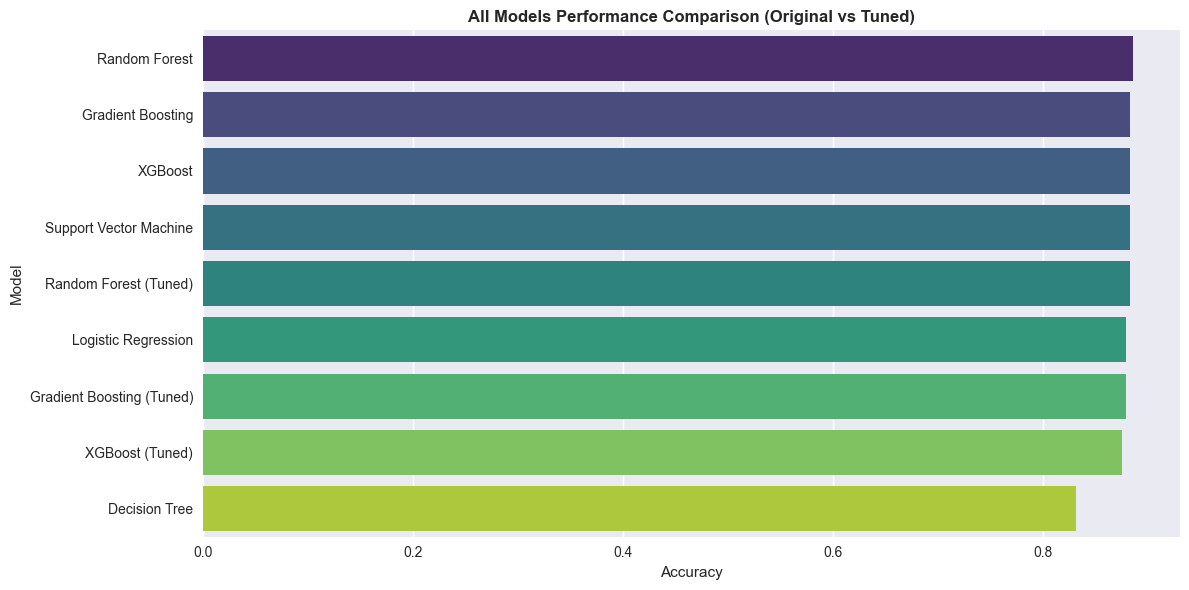

In [11]:
# Compare original vs tuned models
print("📊 Original vs Tuned Model Comparison:")
print("="*60)

# Combine original and tuned results
all_results = results_df.copy()
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df = tuned_results_df.drop(['Best_Params', 'CV_Score'], axis=1)

# Combine results
combined_results = pd.concat([all_results, tuned_results_df], ignore_index=True)
combined_results = combined_results.sort_values('Accuracy', ascending=False)

print(combined_results.round(4))

# Find the overall best model
final_best_model = combined_results.iloc[0]['Model']
final_best_accuracy = combined_results.iloc[0]['Accuracy']

print(f"\n🏆 Final Best Model: {final_best_model}")
print(f"🎯 Final Best Accuracy: {final_best_accuracy:.4f}")

# Visualize comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_results, x='Accuracy', y='Model', palette='viridis')
plt.title('All Models Performance Comparison (Original vs Tuned)', fontweight='bold')
plt.xlabel('Accuracy')
plt.tight_layout()
plt.show()


## 4. Save Best Model and Results


In [12]:
# Determine the best model to save
if final_best_model.endswith('(Tuned)'):
    # Extract base model name
    base_model_name = final_best_model.replace(' (Tuned)', '')
    best_model_to_save = tuned_models[base_model_name]
    print(f"💾 Saving tuned {base_model_name} as the best model...")
else:
    best_model_to_save = models[final_best_model]
    print(f"💾 Saving {final_best_model} as the best model...")

# Save the best model
with open('../backend/saved_models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model_to_save, f)
print("✅ Best model saved to: ../backend/saved_models/best_model.pkl")

# Save the scaler
with open('../backend/saved_models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved to: ../backend/saved_models/scaler.pkl")

# Save the label encoder
with open('../backend/saved_models/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
print("✅ Label encoder saved to: ../backend/saved_models/label_encoder.pkl")


💾 Saving Random Forest as the best model...
✅ Best model saved to: ../backend/saved_models/best_model.pkl
✅ Scaler saved to: ../backend/saved_models/scaler.pkl
✅ Label encoder saved to: ../backend/saved_models/label_encoder.pkl


In [14]:
# Save model comparison results
model_comparison = {
    'best_model': final_best_model,
    'best_accuracy': float(final_best_accuracy),
    'all_results': combined_results.to_dict('records'),
    'feature_names': features,
    'target_classes': le.classes_.tolist(),
    'dataset_info': {
        'total_samples': len(df),
        'training_samples': len(X_train),
        'test_samples': len(X_test),
        'features_count': len(features)
    }
}

with open('../backend/saved_models/model_comparison.json', 'w') as f:
    json.dump(model_comparison, f, indent=2)
print("✅ Model comparison results saved to: ../backend/saved_models/model_comparison.json")

# Final summary
print("\n🎉 Model Training Pipeline Completed Successfully!")
print("="*60)
print(f"📊 Dataset: {len(df)} samples, {len(features)} features")
print(f"🏆 Best Model: {final_best_model}")
print(f"🎯 Best Accuracy: {final_best_accuracy:.4f}")
print(f"📁 Files Created:")
print(f"  • ../backend/saved_models/best_model.pkl")
print(f"  • ../backend/saved_models/scaler.pkl")
print(f"  • ../backend/saved_models/label_encoder.pkl")
print(f"  • ../backend/saved_models/model_comparison.json")

print(f"\n📈 Model Performance Summary:")
for _, row in combined_results.head(5).iterrows():
    print(f"  • {row['Model']}: {row['Accuracy']:.4f} accuracy")



✅ Model comparison results saved to: ../backend/saved_models/model_comparison.json

🎉 Model Training Pipeline Completed Successfully!
📊 Dataset: 1359 samples, 11 features
🏆 Best Model: Random Forest
🎯 Best Accuracy: 0.8860
📁 Files Created:
  • ../backend/saved_models/best_model.pkl
  • ../backend/saved_models/scaler.pkl
  • ../backend/saved_models/label_encoder.pkl
  • ../backend/saved_models/model_comparison.json

📈 Model Performance Summary:
  • Random Forest: 0.8860 accuracy
  • Gradient Boosting: 0.8824 accuracy
  • XGBoost: 0.8824 accuracy
  • Support Vector Machine: 0.8824 accuracy
  • Random Forest (Tuned): 0.8824 accuracy
